In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager

In [41]:
rin = {}
for x in ['a', 'b', 'c', 'd', 'e']:
    rin[x] = {}
    tmp = pd.read_table(f'{x}_rin.fraction')
    for k in ['hb', 'vdw', 'ss', 'ion', 'pp', 'pc', 'iac', 'any']:
        rin[x][k] = np.zeros((200, 200))
        for n in range(len(tmp)):
            i = tmp.at[n, 'i']
            j = tmp.at[n, 'j']
            rin[x][k][i][j] = tmp.at[n, k]
            rin[x][k][j][i] = tmp.at[n, k]

In [47]:
for x in [['a', 'b'], ['b', 'c'], ['b', 'd'], ['b', 'e']]:
    dif = f'{x[0]}-{x[1]}'
    rin[dif] = {}
    for k in ['hb', 'vdw', 'ss', 'ion', 'pp', 'pc', 'iac', 'any']:
        rin[dif][k] = np.subtract(rin[x[1]][k], rin[x[0]][k])

In [49]:
rin['a-b']['hb']

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , -0.16,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.21,  0.01,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.21, ...,  0.  , -0.2 ,  0.  ],
       [ 0.  , -0.16,  0.01, ..., -0.2 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

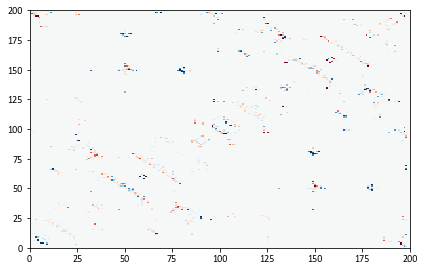

In [71]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(rin['b-c']['any'], cmap = 'RdBu', vmin = -0.5, vmax = 0.5)